In [ ]:
import pandas as pd
import yfinance as yf
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
!pip install yfinance

In [ ]:
df = pd.read_csv('stocks.csv')

In [ ]:
df.shape

(1430, 6)

In [ ]:
df.describe

<bound method NDFrame.describe of            Price               Close                High                 Low  \
0         Ticker           ^INDIAVIX           ^INDIAVIX           ^INDIAVIX   
1           Date                 NaN                 NaN                 NaN   
2     2020-01-02  11.489999771118164  11.699999809265137  10.729999542236328   
3     2020-01-03  12.699999809265137    12.9399995803833    10.6899995803833   
4     2020-01-06  14.779999732971191  15.100000381469727  12.699999809265137   
...          ...                 ...                 ...                 ...   
1425  2025-10-24   11.59000015258789    11.9399995803833    11.4399995803833   
1426  2025-10-27  11.859999656677246  12.729999542236328  11.279999732971191   
1427  2025-10-28  11.949999809265137  12.640000343322754  10.710000038146973   
1428  2025-10-29  11.970000267028809  12.100000381469727  11.229999542236328   
1429  2025-10-30  12.067500114440918  12.272500038146973  11.704999923706055   

                    Open     Volume  
0              ^INDIAVIX  ^INDIAVIX  
1                    NaN        NaN  
2     11.600000381469727          0  
3     11.489999771118164          0  
4     12.699999809265137          0  
...                  ...        ...  
1425  11.729999542236328          0  
1426   11.59000015258789          0  
1427  11.859999656677246          0  
1428  11.949999809265137          0  
1429   11.97249984741211          0  

[1430 rows x 6 columns]>

In [ ]:
df.head(10)

,Price,Close,High,Low,Open,Volume
0,Ticker,^INDIAVIX,^INDIAVIX,^INDIAVIX,^INDIAVIX,^INDIAVIX
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,11.489999771118164,11.699999809265137,10.729999542236328,11.600000381469727,0
3,2020-01-03,12.699999809265137,12.9399995803833,10.6899995803833,11.489999771118164,0
4,2020-01-06,14.779999732971191,15.100000381469727,12.699999809265137,12.699999809265137,0
5,2020-01-07,14.609999656677246,14.90999984741211,14.460000038146973,14.779999732971191,0
6,2020-01-08,15.640000343322754,16.389999389648438,13.789999961853027,14.609999656677246,0
7,2020-01-09,14.0,15.640000343322754,13.0,15.640000343322754,0
8,2020-01-10,14.079999923706055,14.25,13.180000305175781,14.0,0
9,2020-01-13,14.279999732971191,14.5,13.579999923706055,14.079999923706055,0


In [ ]:
df.tail(10)

,Price,Close,High,Low,Open,Volume
1420,2025-10-16,10.869999885559082,11.0600004196167,10.380000114440918,10.529999732971191,0
1421,2025-10-17,11.630000114440918,11.8100004196167,9.779999732971191,10.869999885559082,0
1422,2025-10-20,11.359999656677246,11.880000114440918,10.670000076293945,11.630000114440918,0
1423,2025-10-21,11.300000190734863,11.600000381469727,10.699999809265137,11.359999656677246,0
1424,2025-10-23,11.729999542236328,12.050000190734863,10.739999771118164,11.300000190734863,0
1425,2025-10-24,11.59000015258789,11.9399995803833,11.4399995803833,11.729999542236328,0
1426,2025-10-27,11.859999656677246,12.729999542236328,11.279999732971191,11.59000015258789,0
1427,2025-10-28,11.949999809265137,12.640000343322754,10.710000038146973,11.859999656677246,0
1428,2025-10-29,11.970000267028809,12.100000381469727,11.229999542236328,11.949999809265137,0
1429,2025-10-30,12.067500114440918,12.272500038146973,11.704999923706055,11.97249984741211,0


In [ ]:
colum_to_normalize=['Close','High','Low','Open','Volume' ]
df = df.iloc[2:].copy() # Remove the first two rows
x=df[colum_to_normalize].values.astype(float)
x
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_scaled
df[colum_to_normalize]=x_scaled
df

,Price,Close,High,Low,Open,Volume
4,2020-01-06,0.066332,0.063490,0.066676,0.038117,0.0
5,2020-01-07,0.064026,0.061003,0.092639,0.066332,0.0
6,2020-01-08,0.077998,0.080377,0.082756,0.064026,0.0
7,2020-01-09,0.055751,0.070559,0.071102,0.077998,0.0
8,2020-01-10,0.056837,0.052363,0.073757,0.055751,0.0
...,...,...,...,...,...,...
1425,2025-10-24,0.023060,0.022123,0.048090,0.024959,0.0
1426,2025-10-27,0.026723,0.032465,0.045729,0.023060,0.0
1427,2025-10-28,0.027944,0.031287,0.037321,0.026723,0.0
1428,2025-10-29,0.028215,0.024218,0.044992,0.027944,0.0


In [ ]:
data = df.fillna(df[colum_to_normalize].mean())

In [ ]:
a=data

In [ ]:
b=data['High']

In [ ]:
len(a.columns)

6

In [ ]:
a.columns

Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [ ]:
feature_list=['Price', 'Close', 'High', 'Low', 'Open', 'Volume']

In [ ]:
len(feature_list)

6

In [ ]:
a=data[feature_list]
a.head()

,Price,Close,High,Low,Open,Volume
4,2020-01-06,0.066332,0.063490,0.066676,0.038117,0.0
5,2020-01-07,0.064026,0.061003,0.092639,0.066332,0.0
6,2020-01-08,0.077998,0.080377,0.082756,0.064026,0.0
7,2020-01-09,0.055751,0.070559,0.071102,0.077998,0.0
8,2020-01-10,0.056837,0.052363,0.073757,0.055751,0.0


In [ ]:
a=data[colum_to_normalize]
a.head()

,Close,High,Low,Open,Volume
4,0.066332,0.063490,0.066676,0.038117,0.0
5,0.064026,0.061003,0.092639,0.066332,0.0
6,0.077998,0.080377,0.082756,0.064026,0.0
7,0.055751,0.070559,0.071102,0.077998,0.0
8,0.056837,0.052363,0.073757,0.055751,0.0


In [ ]:
print(a_train)
print(a_test)
print(b_train)
print(b_test)

           Price     Close      High       Low      Open  Volume
394   2021-08-16  0.048426  0.044639  0.047205  0.042051     0.0
577   2022-05-13  0.184482  0.183532  0.188671  0.195062     0.0
811   2023-04-25  0.022111  0.020422  0.047942  0.024145     0.0
1232  2025-01-13  0.082881  0.077628  0.092492  0.068231     0.0
589   2022-05-31  0.143652  0.137453  0.169642  0.136869     0.0
...          ...       ...       ...       ...       ...     ...
1099  2024-07-01  0.053445  0.052101  0.082756  0.053039     0.0
1134  2024-08-21  0.046663  0.049745  0.053695  0.053310     0.0
1298  2025-04-23  0.082339  0.082079  0.068742  0.072436     0.0
864   2023-07-11  0.015193  0.015840  0.040861  0.021297     0.0
1130  2024-08-14  0.075285  0.078152  0.083198  0.085187     0.0

[998 rows x 6 columns]
           Price     Close      High       Low      Open  Volume
127   2020-07-07  0.206321  0.201597  0.236908  0.207678     0.0
1193  2024-11-13  0.075285  0.073570  0.084821  0.063755     0.0
4

In [ ]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
stc=StandardScaler()
a_train=stc.fit_transform(a_train)
a_test=stc.transform(a_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(a_train,b_train)
b_pred_regr = regr.predict(a_test)

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

print('MSE = ', mse(b_pred_regr, b_test))

print('MAE = ',mae(b_pred_regr, b_test))
print ('R2 Score =' , r2_score(b_pred_regr,b_test))

MSE =  0.0009389700282787568
MAE =  0.02222018529745717
R2 Score = 0.9107815980191551


In [ ]:
from sklearn.svm import SVR

In [ ]:
# Initialize and train the Support Vector Regression (SVR) model
svr = SVR(kernel='rbf')  # Radial Basis Function (RBF) kernel
svr.fit(a_train, b_train)

# Make predictions on the test data
b_pred_sv = svr.predict(a_test)

# Calculate evaluation metrics
mse_value = mse(b_test, b_pred_sv)
mae_value = mae(b_test,b_pred_sv)
r2_value = r2_score(b_test, b_pred_sv)

# Print evaluation metrics
print('SVM Regression MSE =', mse_value)
print('SVM Regression MAE =', mae_value)
print('SVM Regression R2 Score =', r2_value)

SVM Regression MSE = 0.007196138090489186
SVM Regression MAE = 0.08319517205448401
SVM Regression R2 Score = 0.4868152625801321


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Initialize and train the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=0, learning_rate=0.1)
gbr.fit(a_train, b_train)

# Make predictions on the test data
b_pred_gbr = gbr.predict(a_test)

# Calculate evaluation metrics
mse_value = mse(b_test, b_pred_gbr)
mae_value = mae(b_test, b_pred_gbr)
r2_value = r2_score(b_test, b_pred_gbr)

# Print evaluation metrics
print('Gradient Boosting Regression MSE =', mse_value)
print('Gradient Boosting Regression MAE =', mae_value)
print('Gradient Boosting Regression R2 Score =', r2_value)

Gradient Boosting Regression MSE = 2.923643301079492e-05
Gradient Boosting Regression MAE = 0.0012564300173556538
Gradient Boosting Regression R2 Score = 0.9979150356748201


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Initialize and train the KNeighborsRegressor model
knn = KNeighborsRegressor(n_neighbors=5)  # Set number of neighbors (k) to 5 (adjust as needed)
knn.fit(a_train, b_train)

# Make predictions on the test data
b_pred_K = knn.predict(a_test)

# Calculate evaluation metrics
mse_value = mse(b_test, b_pred_K)
mae_value = mae(b_test, b_pred_K)
r2_value = r2_score(b_test, b_pred_K)

# Print evaluation metrics
print('KNN Regression MSE =', mse_value)
print('KNN Regression MAE =', mae_value)
print('KNN Regression R2 Score =', r2_value)

KNN Regression MSE = 0.00010657902219136268
KNN Regression MAE = 0.0035397695107933884
KNN Regression R2 Score = 0.9923994333029784


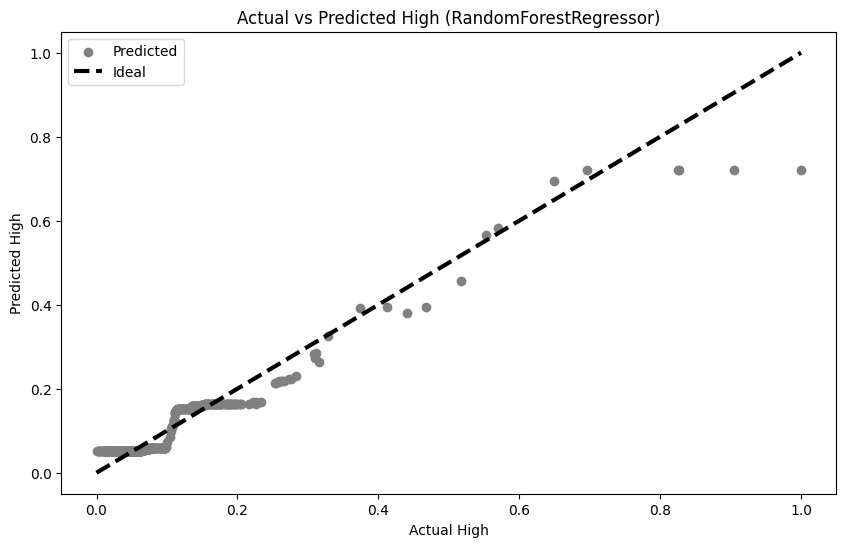

In [92]:
# Plotting actual vs predicted for RandomForestRegressor
plt.figure(figsize=(10, 6))
plt.scatter(b_test, b_pred_regr, color='grey', label='Predicted')
plt.plot([b_test.min(), b_test.max()], [b_test.min(), b_test.max()], 'k--', lw=3, label='Ideal')
plt.xlabel('Actual High')
plt.ylabel('Predicted High')
plt.title('Actual vs Predicted High (RandomForestRegressor)')
plt.legend()  # Add legend to distinguish between actual and predicted
plt.show()

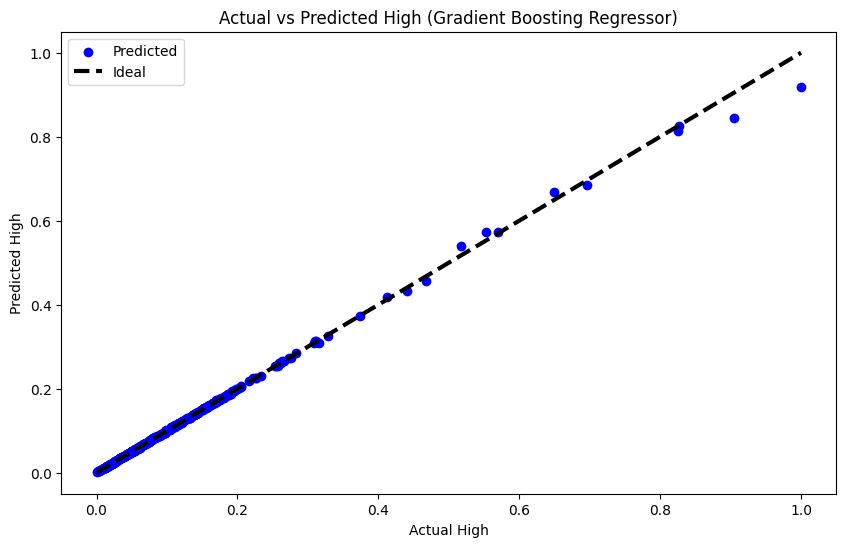

In [81]:
# Plotting actual vs predicted for GradientBoostingRegressor
plt.figure(figsize=(10, 6))
plt.scatter(b_test, b_pred_gbr, color='blue', label='Predicted')
plt.plot([b_test.min(), b_test.max()], [b_test.min(), b_test.max()], 'k--', lw=3, label='Ideal')
plt.xlabel('Actual High')
plt.ylabel('Predicted High')
plt.title('Actual vs Predicted High (Gradient Boosting Regressor)')
plt.legend()  # Add legend to distinguish between actual and predicted
plt.show()

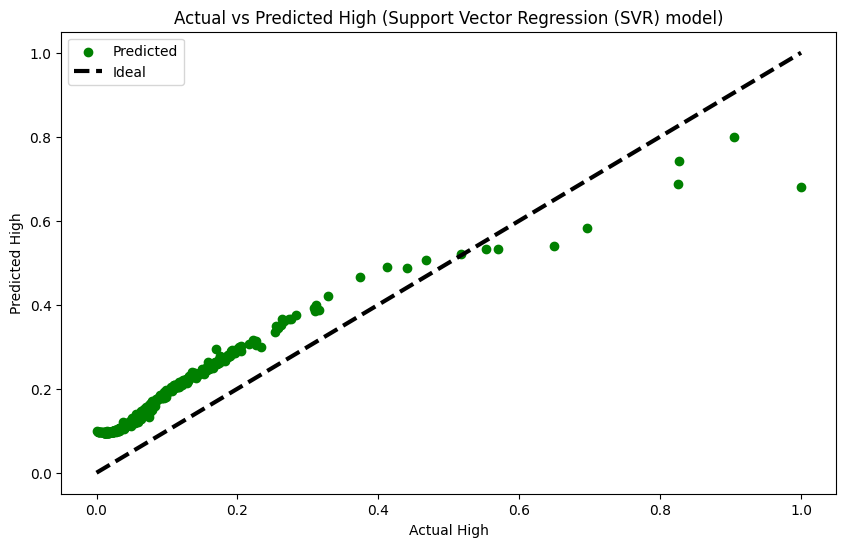

In [82]:
# Plotting actual vs predicted for SVR
plt.figure(figsize=(10, 6))
plt.scatter(b_test, b_pred_sv, color='green', label='Predicted')
plt.plot([b_test.min(), b_test.max()], [b_test.min(), b_test.max()], 'k--', lw=3, label='Ideal')
plt.xlabel('Actual High')
plt.ylabel('Predicted High')
plt.title('Actual vs Predicted High (Support Vector Regression (SVR) model)')
plt.legend()  # Add legend to distinguish between actual and predicted
plt.show()

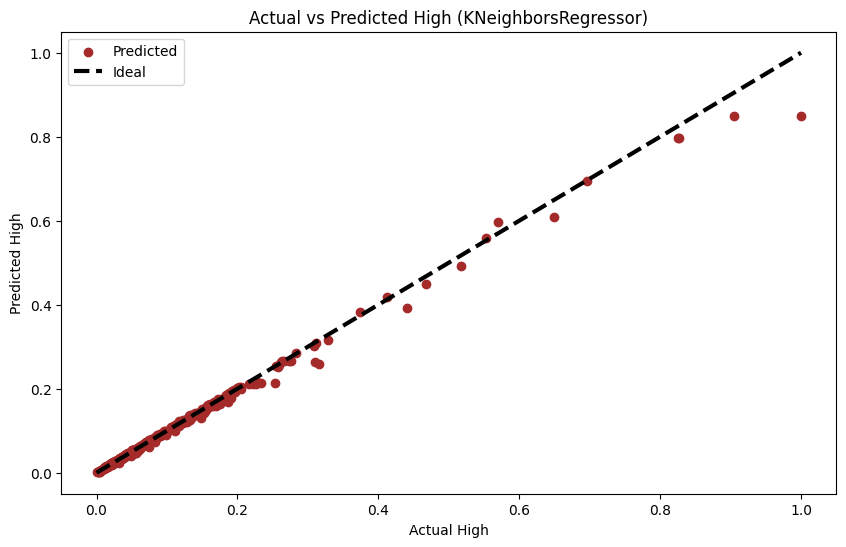

In [87]:
# Plotting actual vs predicted for KNeighborsRegressor
plt.figure(figsize=(10, 6))
plt.scatter(b_test, b_pred_K, color='brown', label='Predicted')
plt.plot([b_test.min(), b_test.max()], [b_test.min(), b_test.max()], 'k--', lw=3, label='Ideal')
plt.xlabel('Actual High')
plt.ylabel('Predicted High')
plt.title('Actual vs Predicted High (KNeighborsRegressor)')
plt.legend()  # Add legend to distinguish between actual and predicted
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Define algorithms and corresponding evaluation metrics (MSE, MAE, R2 Score)
algorithms = ['Random Forest', 'Gradient Boosting', 'SVR', 'K Neighbors']
mse_values = [0.0009389700282787568, 2.923643301079492e-05,0.007196138090489186,0.00010657902219136268]
mae_values = [0.02222018529745717,0.0012564300173556538,0.08319517205448401,0.0035397695107933884 ]
r2_scores = [0.9107815980191551, 0.9979150356748201 ,0.4868152625801321 ,0.9923994333029784 ]



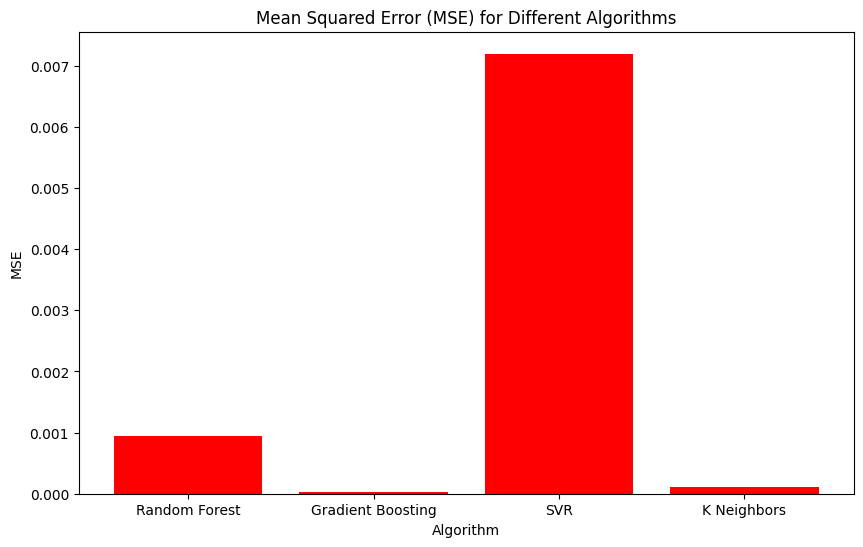

In [84]:
# Plot MSE for each algorithm
plt.figure(figsize=(10, 6))
plt.bar(algorithms, mse_values, color='red')
plt.xlabel('Algorithm')
plt.ylabel('MSE')
plt.title('Mean Squared Error (MSE) for Different Algorithms')
plt.show()

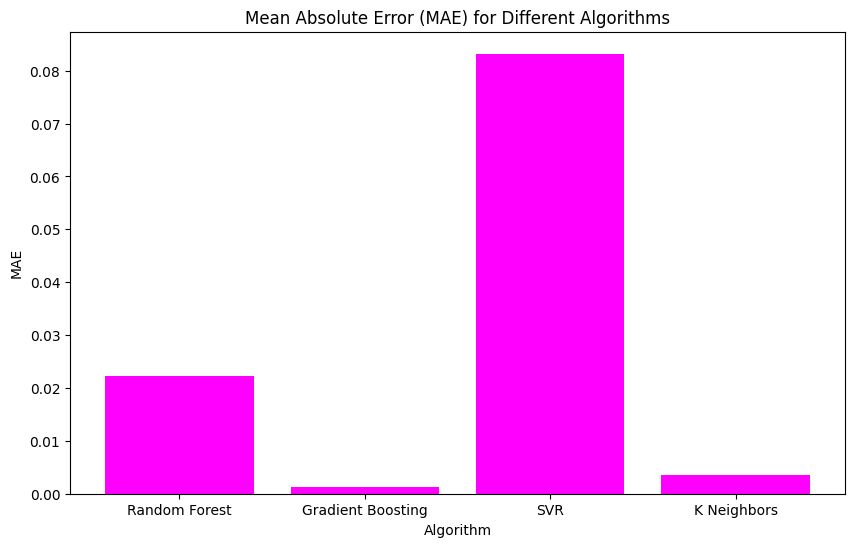

In [85]:
# Plot MAE for each algorithm
plt.figure(figsize=(10, 6))
plt.bar(algorithms, mae_values, color='magenta')
plt.xlabel('Algorithm')
plt.ylabel('MAE')
plt.title('Mean Absolute Error (MAE) for Different Algorithms')
plt.show()

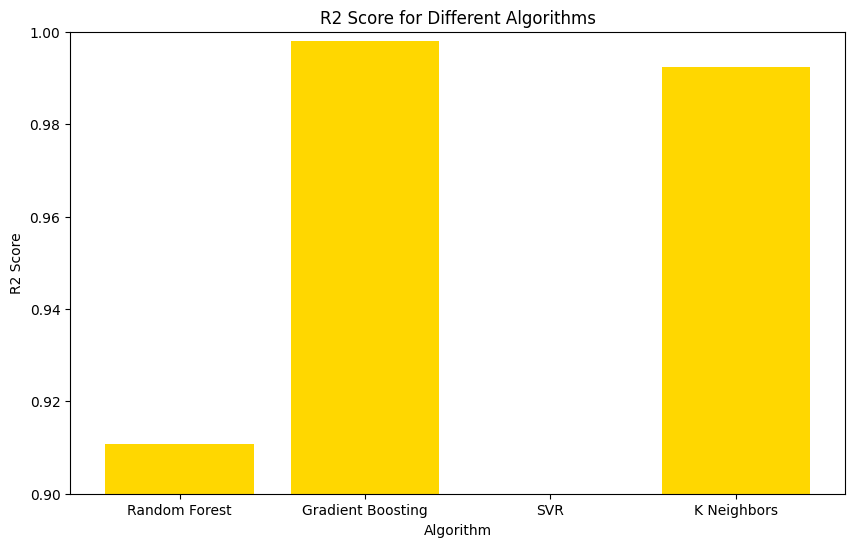

In [93]:
# Plot R2 Score for each algorithm
plt.figure(figsize=(10, 6))
plt.bar(algorithms, r2_scores, color='gold')
plt.xlabel('Algorithm')
plt.ylabel('R2 Score')
plt.title('R2 Score for Different Algorithms')
plt.ylim(0.9, 1.0)  # Set y-axis limit to focus on R2 Score range (0.9 to 1.0)
plt.show()